# Notebook for tests with the Gradient Descent Algorithm


In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Example 1


## Definig a funcion:
$f(x) = x^2 + x + 1$

## And the derivative of this function:
$df(x) = 2x + 1$



In [0]:
def f(x):
    return x**2 + x + 1

def df(x):
    return 2*x + 1

## Generating some data with numpy

In [0]:
x_1 = np.linspace(start=-30, stop=30, num=500)

## Visualizing data

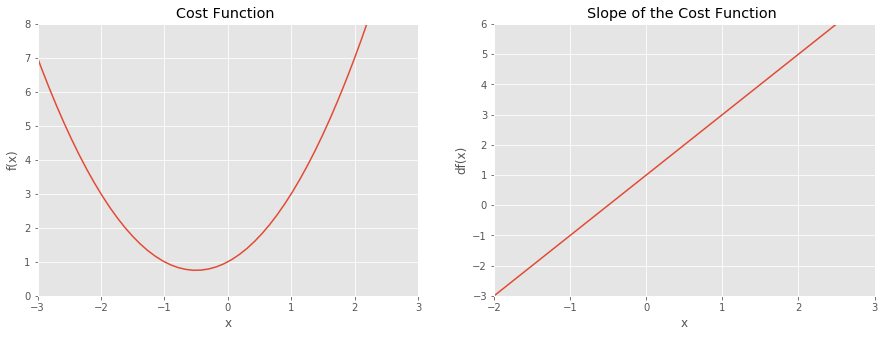

In [23]:
plt.figure(figsize=[15, 5])

# 1rst Chart
plt.subplot(1, 2, 1)
plt.style.use("ggplot")
plt.title("Cost Function ")

plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel("x")
plt.ylabel("f(x)")

plt.plot(x_1, f(x_1))

# 2rst Chart
plt.subplot(1, 2, 2)
plt.style.use("ggplot")
plt.title("Slope of the Cost Function ")
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.xlabel("x")
plt.ylabel("df(x)")

plt.plot(x_1, df(x_1))

plt.show()

The function of the gradient descent algorithm will be to find the minimum cost of a given function, once the learning step corresponds to the established precision

In [24]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplyier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplyier * gradient
    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step_size <= precision:
        print(f'ran {n} times.')
        break
    
print(f'Local minimum occurs at: {new_x}')
print(f'Slope of df(x) value of this point is: {df(new_x)}')
print(f'f(x) value or cost at this point: {f(new_x)}')

ran 50 times.
Local minimum occurs at: -0.49996003706460423
Slope of df(x) value of this point is: 7.992587079153068e-05
f(x) value or cost at this point: 0.7500000015970362


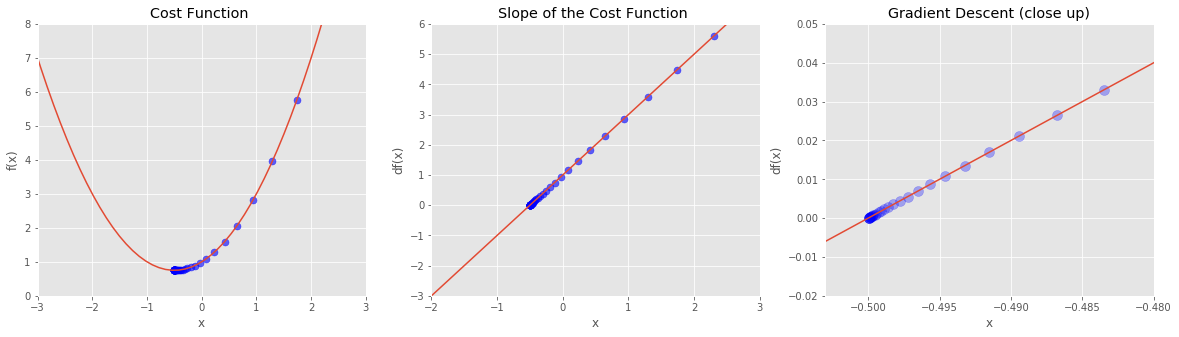

In [25]:
plt.figure(figsize=[20, 5])

# 1rst Chart
plt.subplot(1, 3, 1)
plt.style.use("ggplot")
plt.title("Cost Function ")

plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel("x")
plt.ylabel("f(x)")

plt.plot(x_1, f(x_1))

values = np.array(x_list)
plt.scatter(x_list, f(values), color="blue", s=50, alpha=0.6)

# 2rst Chart
plt.subplot(1, 3, 2)
plt.style.use("ggplot")
plt.title("Slope of the Cost Function ")
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.xlabel("x")
plt.ylabel("df(x)")

plt.plot(x_1, df(x_1))
plt.scatter(x_list, slope_list, s=50, color="blue", alpha=0.6)

# 3rst Chart
plt.subplot(1, 3, 3)
plt.style.use("ggplot")
plt.title("Gradient Descent (close up)")
plt.xlim(-0.503, -0.48)
plt.ylim(-0.02, 0.05)
plt.xlabel("x")
plt.ylabel("df(x)")

plt.plot(x_1, df(x_1))
plt.scatter(x_list, slope_list, s=100, color="blue", alpha=0.3)

plt.show()

# Example 2
Negative points of the Batch Gradient Descent algorithm

Function:
$$g(x) = x^4 - 4x^2 + 5$$

Derivative:
$$dg(x) = 4x^3 - 8x$$

In [0]:
# Defining functions

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

In [0]:
# Make some data
x_2 = np.linspace(start=-2, stop=2, num=1000)

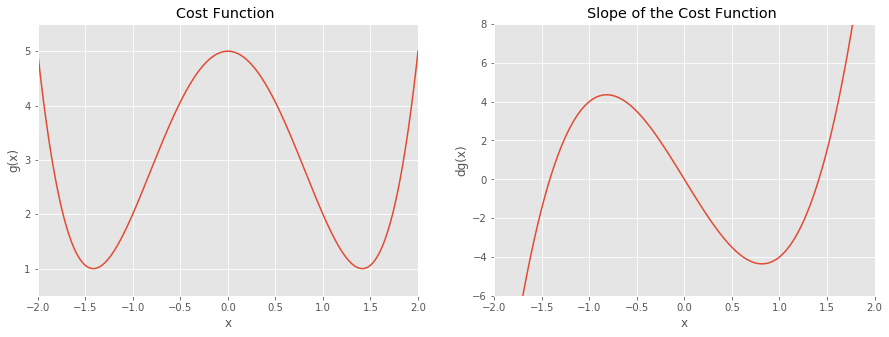

In [41]:
plt.figure(figsize=[15, 5])

# 1rst Chart
plt.subplot(1, 2, 1)
plt.style.use("ggplot")
plt.title("Cost Function ")

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.xlabel("x")
plt.ylabel("g(x)")

plt.plot(x_2, g(x_2))

# 2rst Chart
plt.subplot(1, 2, 2)
plt.style.use("ggplot")
plt.title("Slope of the Cost Function ")
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.xlabel("x")
plt.ylabel("dg(x)")

plt.plot(x_2, dg(x_2))

plt.show()

In [0]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.01, precision=0.0001):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(1000):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size <= precision:
            break

    return new_x, x_list, slope_list

In [52]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=-0.1)
print(f'Local min occurs at: {local_min}')
print(f'Number of steps: {len(list_x)}')

Local min occurs at: -1.413709226894381
Number of steps: 77


In [0]:
def plot_comparison(x, list_x, function, deriv_list, derivative_func):
    plt.figure(figsize=[15, 5])

    # 1rst Chart
    plt.subplot(1, 2, 1)
    plt.style.use("ggplot")
    plt.title("Cost Function ")

    plt.xlim(-2, 2)
    plt.ylim(0.5, 5.5)
    plt.xlabel("x")
    plt.ylabel("g(x)")

    plt.plot(x, function(x))
    plt.scatter(list_x, function(np.array(list_x)), color="blue", alpha=0.3)

    # 2rst Chart
    plt.subplot(1, 2, 2)
    plt.style.use("ggplot")
    plt.title("Slope of the Cost Function ")
    plt.xlim(-2, 2)
    plt.ylim(-6, 8)
    plt.xlabel("x")
    plt.ylabel("dg(x)")

    plt.plot(x, derivative_func(x))
    plt.scatter(list_x, deriv_list, color="blue", alpha=0.3)

    plt.show()

The negative point about this algorithm is the sensitivity to the initial_guess value. The minimum found can be completely different dependending on this initial value.

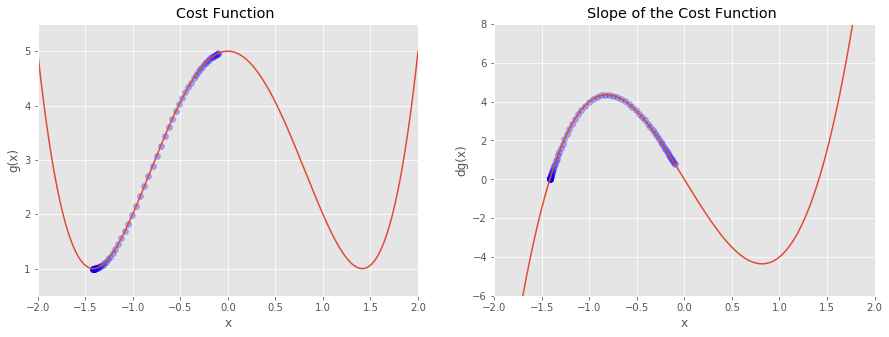

In [66]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=-0.1)

plot_comparison(x_2, list_x, g, deriv_list, dg)

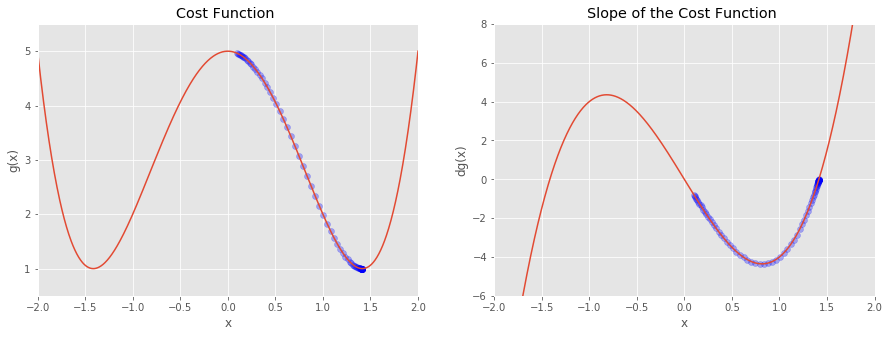

In [67]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=0.1)

plot_comparison(x_2, list_x, g, deriv_list, dg)